---
# Machine Learning
---
*Note: This notebook details only the Python code used to implement machine learning models, but doesn't address any of the underlying math or theory. For background on machine learning and the algorithms used in this notebook, consult the course slides.*

In this lesson, we'll use [**scikit-learn**](http://scikit-learn.org/stable/) to implement several machine learning algorithms in Python. Scikit-learn is the go-to package for machine learning in Python, and contains not only a vast library of machine learning models but also a variety of tools for **pre-processing** data so that it can better be interpreted by ML algorithms. Scikit-learn is built on top of the other packages we've discussed in this course, such as numpy, SciPy, matplotlib, etc. 

Before we begin, we'll import some familiar libraries that we'll later use to assess our models.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
## Regression
---

The first machine learning task we'll tackle is unsupervised regression. (As a reminder, "unsupervised" simply means that our training data has labeled, and "regression" means that the labels we're predicting are continuous, rather than categorical.)

In this example, we'll use a standard [**linear regression model**](https://en.wikipedia.org/wiki/Linear_regression) to predict the price of houses based on a variety of datapoints. We'll use the [Boston housing dataset](https://www.kaggle.com/c/boston-housing).

Fortunately, scikit-learn comes built-in with this and many other datasets. We can load them like this:

In [2]:
from sklearn import datasets

boston = datasets.load_boston()

Somewhat confusingly, the datasets are stored as a `Bunch` object:

In [3]:
type(boston)

sklearn.utils.Bunch

We can access useful information about the dataset by viewing the `DESCR` attribute:

In [4]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

It also helps to view the data as a pandas dataframe, to get a sense of the rows and columns.

In [5]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

# Adding the label/dependent variable: house price
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


As we can see, the dataset contains lots of information that we could reasonably expect to influence price of a house - number of rooms, local tax, etc.

Based on this data, we'll initialize a linear regression model and then **fit it** on our training data, meaning we will train the algorithm so that it optimally predicts the house prices of the training dataset.

In SciKitLearn, we usually train models by importing the particular model we're using, identifying the features and labels - X and y - and then using the `.fit()` method, as below:

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = boston.data
y = boston.target

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

A linear regression model works by assigning **coefficients** to each field in the dataset, which are multiplied by each datapoint's values to either increase or decrease the predicted price depending on the effect each column had on the price in the training data.

Let's take a look at the coefficients:

In [7]:
#Coefficients are stored in the linear regression object...
#... the names of each variable are stored in the original bunch object.

pd.DataFrame(lr.coef_, boston.feature_names)

,0
CRIM,-0.107171
ZN,0.046395
INDUS,0.020860
CHAS,2.688561
NOX,-17.795759
RM,3.804752
AGE,0.000751
DIS,-1.475759
RAD,0.305655
TAX,-0.012329


Interpreting these results, we see, for example that the number of **rooms** (`RM`) had a strong positive correlation to housing prices, whereas **nitric oxide concentration** (`NOX`) had a strong negative correlation. This makes sense intuitively: wouldn't you pay more for a house with lots of rooms and not so much nitric oxide?

Let's also utilize scikit-learn's **cross validation** tools to assess accuracy of model. These tools allow us to compare the results our model predicted against the actual prices of homes.

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import cross_val_score

C:\Users\HB711GF\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


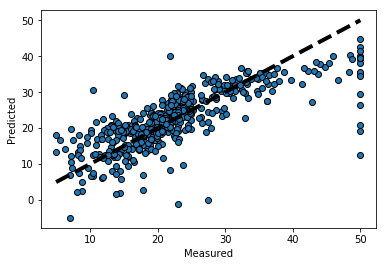

In [9]:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Visually, we can see our model did a fairly good job at predicting house prices. For a more rigorous measurement of a regression model's accuracy, we might use [mean-squared error](https://en.wikipedia.org/wiki/Mean_squared_error).

---
## Classification
---

Next, let's try a supervised classification problem. (Again, as a refresher, this means our training data is labeled and that we're trying to predict discrete categories.) 

For this and the following clustering example, we'll use the familiar [Iris Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and attempt to classify flowers' species based on their petal and sepal sizes. 

In [10]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

Viewed in a more user-friendly format, the data's features look like this:

In [11]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Looking back to the description above, we see that the columns correspond to the sepal width, sepal length, petal width, and petal lenght. The `targets`, then, contain the types of flowers:

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Again, from the description, we glean that these three values correspond to Setosa, Versicolour, and Virginica flowers respectively. 

With an understanding of the datset, we're ready to import SciKitLearn and train a basic [**K-Nearest Neighbor classification model**](http://scikit-learn.org/stable/modules/neighbors.html).

Before we do, though, we have to split the data into a **training set** and a **test set**.

In [13]:
from sklearn.cross_validation import train_test_split

X = iris.data
y = iris.target

#Let's split it into 4: train, test, X, Y

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)

One of the simplest classification models available, the K-Nearest Neighbor algorithm takes continuous variables as inputs to train the model, so the Iris dataset is an ideal input. 

For each new test value, the algorithm simply finds the datapoint in the training set that is the closest to the test value in [Euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance), and classifies the test value as whatever that nearest neighbor is classified as.

It's extremely simple, but surprisingly accurate. Let's test it - first we train the model:

In [14]:
from sklearn.neighbors import KNeighborsClassifier

my_classifier = KNeighborsClassifier()

my_classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Then, we use it to predict the classifications (flower species) of the test data:

In [15]:
predictions = my_classifier.predict(X_test)

And finally, we'll assess the accuracy:

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, predictions))

0.9866666666666667


Around 97% accurate (depending on how you partitioned you train/test data - it will be slightly different every time).

Not bad, especially considering that it only required about five lines of code.

Training other classification models is with SciKitLearn is just as easy. Another popular, widely used training model is the [decision tree](https://en.wikipedia.org/wiki/Euclidean_distance), which forms a logical "trees" to classify variables. 

To use this classifier, we would repeat the exact same steps:m

In [17]:
from sklearn.tree import DecisionTreeClassifier
#Let's reshuffle our train/test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.5)

my_decision_tree = KNeighborsClassifier()
my_decision_tree.fit(X_train, Y_train)

tree_predictions = my_decision_tree.predict(X_test)

print(accuracy_score(Y_test, tree_predictions))

0.9866666666666667


Broadly speaking, algorithms like K Nearest Neighbor are better at classifying based on _continuous_ data, whereas algorithms like Decision Trees are better at classifying based on _categorical_ data. But clearly both work well on this dataset.

This course won't go into depth on the differences or statistical underpinnings of each algorithm, but learning about them in greater detail will help you better apply these powerful techniques to client work.

---
## Clustering
---

In our final example, we'll try out unsupervised clustering - attempting to find labels/categories where we have none.

For this example, we'll again use the Iris dataset. This may seem counterintuitive, though, since unsupervised learning methods are designed for instances where we *don't* have labels available. Yet the Iris dataset does have labels - the types of flowers.

But in this example, we'll use the Iris dataset as if it *didn't* have labels. What we'll find is that our clustering algorithm does a good job of identifying the different types of flowers, even without being told what they are in advance. This illustrates that unsupervised algorithms can be as effective in finding patterns as supervised algorithms. 

We'll begin by importing the K-Means algorithm itself.

In [18]:
from sklearn.cluster import KMeans

The K-Means algorithm works by intaking multi-dimensional, continuous data, which is exactly what the Iris dataset is. The Iris dataset contains four dimensions of continuous data - petal height, petal width, sepal height, and sepal width. Based on that data, the algorithm will identify *K* clusters within the data, and assign each datapoint to a cluster.

It's important to note that the algorithm needs to be told *K* in advance - it does not automatically identify the number of clusters that is optimal. This requires human intervention and a measurement of the uniformity of datapoints in within each cluster. (Measuring the effectiveness of clusters is beyond the scope of course, but one useful measure is the [Davies-Bouldin index](https://en.wikipedia.org/wiki/Davies%E2%80%93Bouldin_index).)

In Python, the algorithm works similar to the supervised algorithms we've discussed so far. We first need to initialize it, specifying K (or `n_clusters`, as it's called in scikit-learn). Then, we simply use the `.fit()` method on our data.

Let's try the K-Means algorithm on our dataset, then, with K = 8 and K = 3.

In [19]:
#Setting the seed so our results are the same each time:
np.random.seed(5)

print("Actual Classifications \n")
print(y)
print()

#K means clustering results with 8 clusters
estimators_8 = KMeans(n_clusters = 8)
est_8 = estimators_8.fit(X)
labels_8 = est_8.labels_
print("K means results using: 8 clusters \n")
print(labels_8)
print()

#K means clustering results with 3 clusters
estimators_3 = KMeans(n_clusters = 3)
est_3 = estimators_3.fit(X)
labels_3 = est_3.labels_
print("K means results using: 3 clusters \n")
print(labels_3)
print()

Actual Classifications 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

K means results using: 8 clusters 

[1 5 5 5 1 1 5 1 5 5 1 5 5 5 1 1 1 1 1 1 1 1 5 1 5 5 1 1 1 5 5 1 1 1 5 5 1
 5 5 1 1 5 5 1 1 5 1 5 1 5 2 2 2 7 2 7 2 6 2 7 6 7 7 2 7 2 7 7 2 7 4 7 4 2
 2 2 2 2 2 7 7 7 7 4 7 2 2 2 7 7 7 2 7 6 7 7 7 2 6 7 0 4 3 0 0 3 7 3 0 3 0
 4 0 4 4 0 0 3 3 4 0 4 3 4 0 3 4 4 0 3 3 3 0 4 4 3 0 0 4 0 0 0 4 0 0 0 4 0
 0 4]

K means results using: 3 clusters 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2

As we can see, the results when K = 8 seem mostly like random noise. But when we set K = 3 - the number of actual categories in our data -  we begin to see that the algorithm is largely picking up on the actual pattern evident in the data. 

To explore this further, let's look at the cross-tab between the cluster results and the actual flower types.

In [20]:
pd_labels_3 = pd.DataFrame(labels_3)
pd_target = pd.DataFrame(y)

results = pd_labels_3
results = results.rename(columns={0 : 'Prediction'})
results['Target'] = pd_target

#Using Crosstab to print results
crosstab = pd.crosstab(results['Target'], results['Prediction'])
crosstab

Prediction,0,1,2
Target,,,
0,50,0,0
1,0,2,48
2,0,36,14


*It also helps to remind ourselves what the encodings actually correspond to:*

In [21]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


In other words, we can interpret the cross-tab to mean...
> 1. Cluster 0 contained all of the Setosa iris flowers.
> 2. Cluster 1 contained 2 of the Versicolor iris flowers and 48 of the Virginica iris flowers.
> 3. Cluster 2 contained 36 of the Versicolor iris flowers and 14 of the Virginica iris flowers.

This means that the clusters the algorithm found were really meaningful - they closely coincided with the actual types of flowers in the dataset. Again, in practice, clustering algorithms are useful when there are no labels available and we're instead seeking natural patterns in the data. But the fact that our findings so closely coincided with a real, verifiable pattern demonstrates the effectiveness of the algorithm.

This concludes our lesson on machine learning, but we've really only scratched the surface. We've only touched on a few of the most basic algorithms, but scikit-learn alone offers a multitude of different, more powerful algorithms, each suited to different tasks and datasets. Other libraries like [TensorFlow](https://www.tensorflow.org/) leverage even more powerful algorithms and technologies that can complete even more complicated tasks. These technologies help support some of the most exciting, important innovations, at our firm and beyond.

### Other Useful Resources
- [Google Classification Tutorial](https://www.youtube.com/watch?v=AoeEHqVSNOw&t=21s)
- [Google Decision Tree Series](https://www.youtube.com/watch?v=tNa99PG8hR8)
- [Introduction to K-means Clustering](https://www.datascience.com/blog/k-means-clustering)
- [K-means clustering: how it works](https://www.youtube.com/watch?v=_aWzGGNrcic)